<a href="https://colab.research.google.com/github/LuisManuelCatzoliSoriano/Simulacion-I/blob/main/prueba_de_promedios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prueba de los Promedios

Usaremos:
$$H_0:\mu=0.5$$

y

$$H_a: \mu\neq0.5$$

Como prueba para saber si un conjunto de datos proviene de la distribución $U(0,1)$.

Estadístico de prueba:

$$\bar{x}=\frac{u_1+u_2+...+u_n}{N}$$

$$Z_0=\frac{(\bar{x}-0.5)\sqrt{N}}{\sqrt{\frac{1}{12}}}$$

Si $|Z_0|<Z_{\frac{\alpha}{2}}$, entonces no se rechaza la hipótesis, de lo contrario, se rechaza. Con $\alpha$ siendo el nivel de confianza.

In [2]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import requests
import ast
import matplotlib.pyplot as plt

Empezamos leyendo el archivo que tenemos en el repositorio de Guthub:

In [3]:
url = "https://raw.githubusercontent.com/LuisManuelCatzoliSoriano/Simulacion-I/refs/heads/main/data.txt"

response = requests.get(url) #Descarga el contenido del link
contenido = response.text #Transforma el contenido en un texto

lista = ast.literal_eval(contenido) #Transforma un texto en una lista

df = pd.DataFrame(lista, columns=["datos"]) #Crea un DataFrame a partir de la lista de números
df.head() #Muestra las primeras filas del DataFrame

,datos
0,0.78961
1,0.05230
2,0.10699
3,0.55877
4,0.14151


Primero guardamos los números aleatorios en un arreglo:

Definimos la función que realice la prueba:

In [4]:
def pdpromedios(data, alpha):
    x = np.mean(data)
    print("El promedio es:", x)
    N=len(data)
    z_0 = (x - 0.5) * np.sqrt(N) / np.sqrt(1/12)
    z_1=abs(z_0)
    print("El valor absoluto de Z0 es:", z_1)
    z = stats.norm.ppf(1 - alpha/2)
    print("El valor de Z es:", z)
    if z_1 < z:
        return print("No se rechaza la hipótesis")
    else:
        return print("Se rechaza la hipótesis")

La función tiene como argumentos $(data, \alpha)$, en nuestro caso usaremos el conjunto de datos dado y $\alpha=0.05$:

In [5]:
pdpromedios(df, 0.05)

El promedio es: 0.4834193
El valor absoluto de Z0 es: 0.5743722965011459
El valor de Z es: 1.959963984540054
No se rechaza la hipótesis


Por último sería de interés ver una gráfica de los datos y agregar una recta que represente $\mu=0.5$:

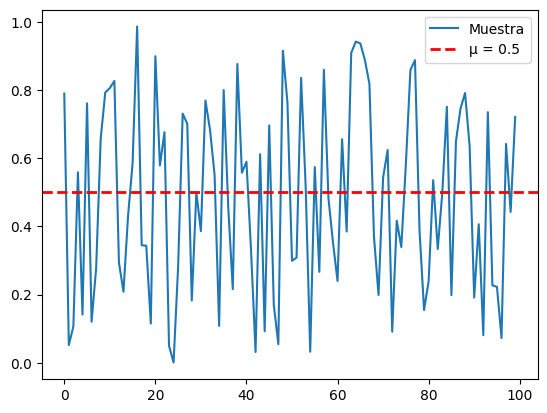

In [10]:
plt.plot(df, label='Muestra')
plt.axhline(y=0.5, color='red', linestyle='--', linewidth=2, label='µ = 0.5')
plt.legend()